<a href="https://colab.research.google.com/github/lalitha-sahitya/Predicting-Charges/blob/main/predicting_charges.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os

In [2]:
!pip install opendatasets

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
import opendatasets as od
od.download('https://www.kaggle.com/datasets/teertha/ushealthinsurancedataset')

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: sahityapalacharla
Your Kaggle Key: ··········
Dataset URL: https://www.kaggle.com/datasets/teertha/ushealthinsurancedataset


100%|██████████| 16.0k/16.0k [00:00<00:00, 6.69MB/s]

In [5]:
os.listdir('ushealthinsurancedataset')

['insurance.csv']

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [40]:
data=pd.read_csv('/content/ushealthinsurancedataset/insurance.csv')
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [41]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [42]:
data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [43]:
data.region.nunique()

4

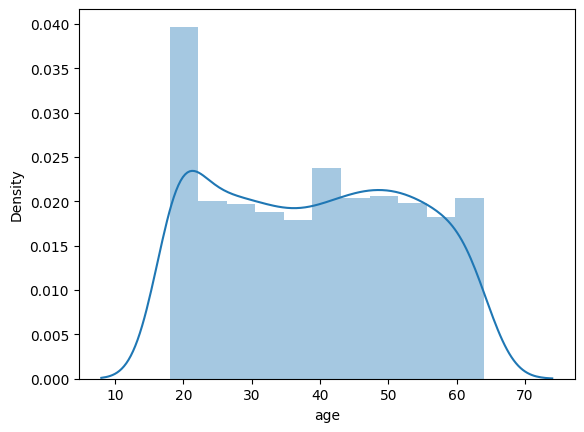

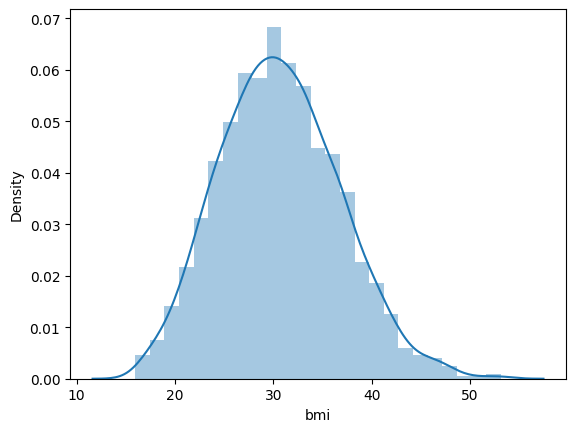

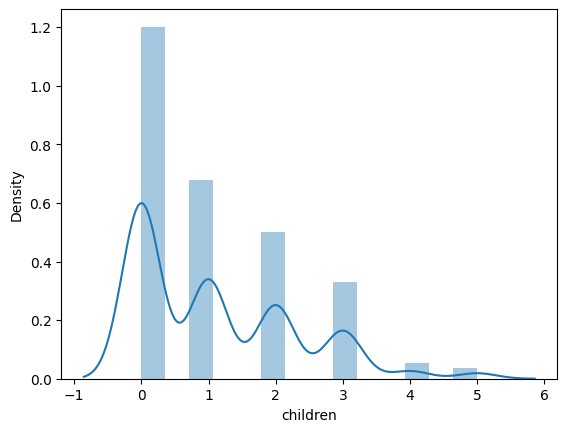

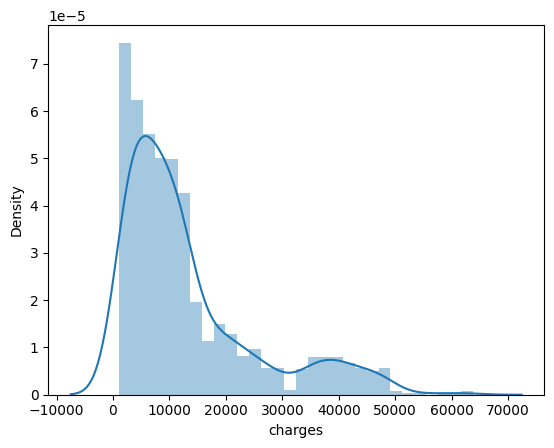

In [44]:
for i in data.select_dtypes(include='number').columns:
  sns.distplot(data[i])
  plt.show()

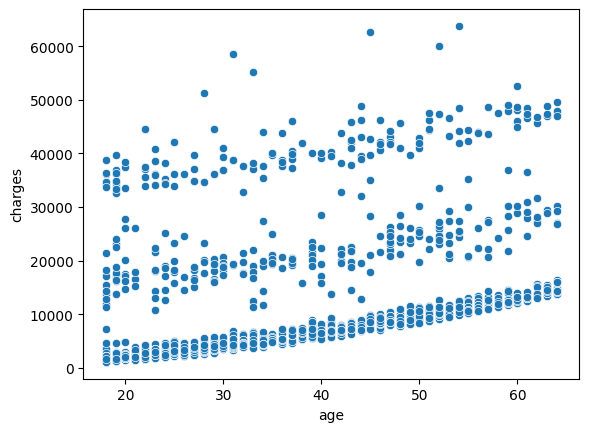

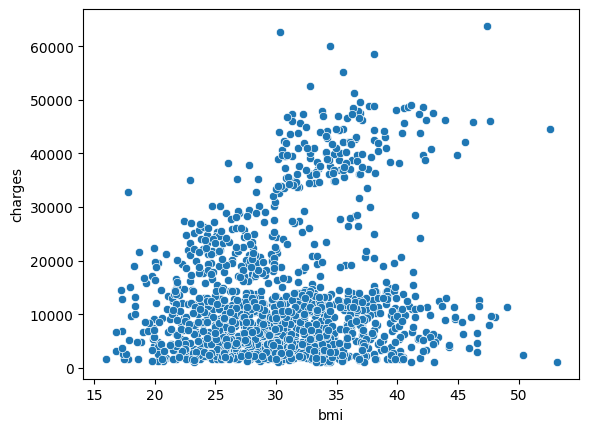

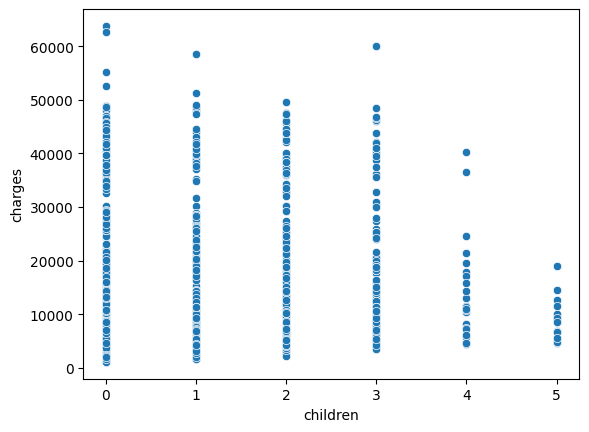

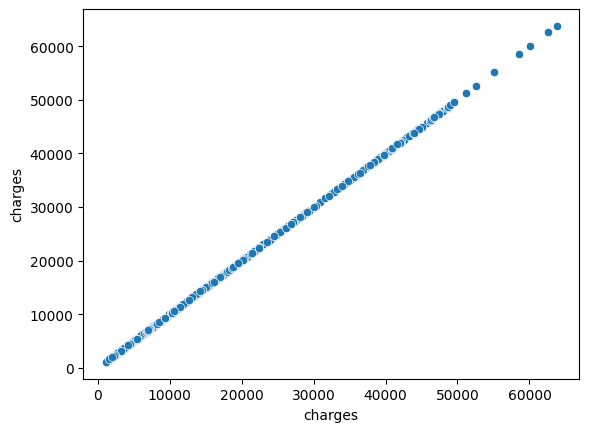

In [45]:
for i in data.select_dtypes(include='number').columns:
  sns.scatterplot(data=data,x=i,y='charges')
  plt.show()

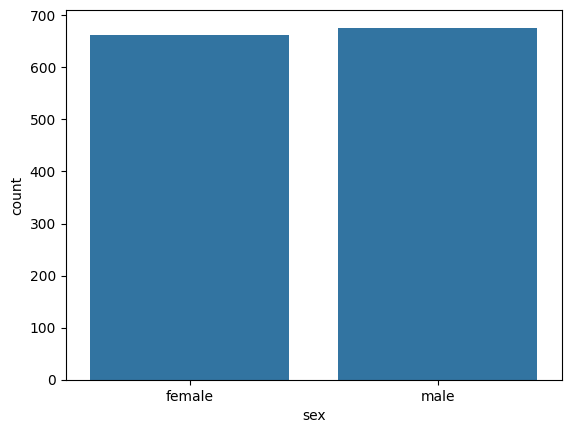

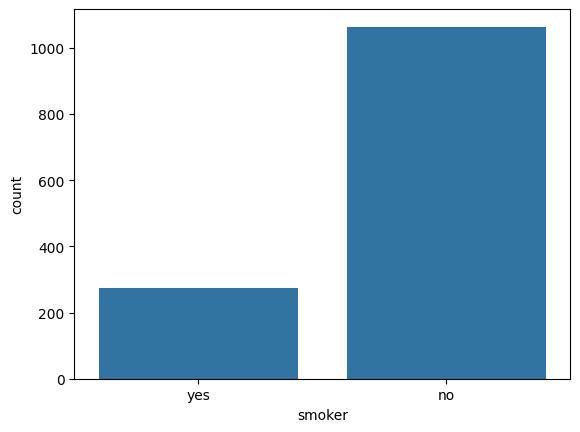

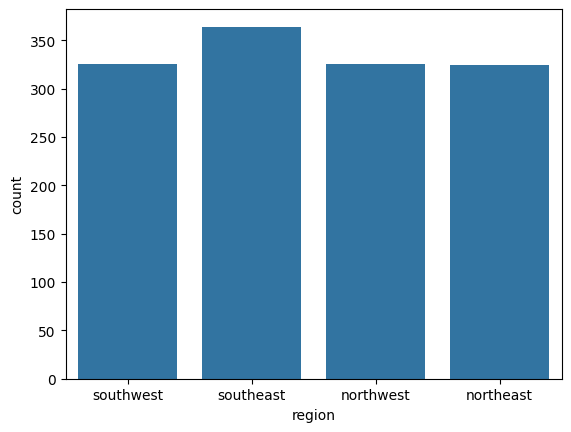

In [46]:
for i in data.select_dtypes(include='object').columns:
  sns.countplot(data=data,x=i)
  plt.show()

In [47]:
x=data.drop('charges',axis=1)
y=data['charges']

In [48]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [49]:
x_train.shape

(1070, 6)

In [50]:
x_test.shape

(268, 6)

In [92]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
for i in x_train.select_dtypes(include='number').columns:
  x_train[i]=sc.fit_transform(x_train[[i]])
  x_test[i]=sc.fit_transform(x_test[[i]])

In [93]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for i in data.select_dtypes(include='object').columns:
  x_train[i]=le.fit_transform(x_train[i])
  x_test[i]=le.fit_transform(x_test[i])

In [94]:
x_train.head()

,age,sex,bmi,children,smoker,region
560,0.472227,0,-1.756525,0.734336,0,1
1285,0.543313,0,-1.033082,-0.911192,0,0
1142,0.898745,0,-0.943687,-0.911192,0,2
969,-0.025379,0,0.622393,3.202629,0,2
486,1.040918,0,-1.504893,1.557100,0,1


In [95]:
x_test.head()

,age,sex,bmi,children,smoker,region
764,0.458596,0,-0.937152,0.822509,0,0
887,-0.187133,0,-0.167527,-0.899620,0,1
890,1.821801,0,-0.665519,-0.899620,1,1
1293,0.530343,1,-0.846608,1.683574,0,1
259,-1.406842,1,0.134287,-0.899620,1,1


In [96]:
x_train

,age,sex,bmi,children,smoker,region
560,0.472227,0,-1.756525,0.734336,0,1
1285,0.543313,0,-1.033082,-0.911192,0,0
1142,0.898745,0,-0.943687,-0.911192,0,2
969,-0.025379,0,0.622393,3.202629,0,2
486,1.040918,0,-1.504893,1.557100,0,1
...,...,...,...,...,...,...
1095,-1.518194,0,0.130717,2.379865,0,0
1130,-0.025379,0,-1.107579,3.202629,0,2
1294,1.325264,1,-0.891539,-0.911192,0,0
860,-0.167551,0,2.820864,0.734336,1,3


In [97]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor, GradientBoostingRegressor
from sklearn.metrics import r2_score

In [98]:
def predicts(model):
  model.fit(x_train,y_train)
  preds=model.predict(x_test)
  return r2_score(y_test,preds)

In [99]:
models=[LinearRegression(),RandomForestRegressor(),DecisionTreeRegressor(),AdaBoostRegressor(),GradientBoostingRegressor()]

In [100]:
for i in models:
  print(predicts(i))

0.7834131372909038
0.8597645379247429
0.7815080050807087
0.8397365348045657
0.8774511200703893
